In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
from tqdm.notebook import tqdm

# adjust the style to emulate ggplot
plt.style.use('ggplot')

YEARS = [2019, 2020, 2021, 2022]
months = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
          5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
          9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

In [2]:
# loading the data
bicing_status = pd.read_parquet(r'..\data\processed\bicing_status.parquet')
bicing_info = pd.read_parquet(r'..\data\processed\bicing_info.parquet')
meteo_stats = pd.read_parquet(r'..\data\processed\meteo_stats.parquet')
calendar = pd.read_parquet(r'..\data\processed\calendar.parquet')


In [3]:
bicing_status.sample(5)

,station_id,year,month,day,hour,ctx_1,ctx_2,ctx_3,ctx_4,percentage_docks_available
601711,21,2022,11,26,18,0.809524,0.476190,0.571429,0.950000,0.952381
13731760,492,2022,11,15,7,0.152174,0.608696,0.583333,0.583333,0.234043
5200589,183,2019,10,31,12,0.857143,0.821429,0.910714,0.928571,0.857143
9965087,344,2019,6,17,20,0.115385,0.115385,0.115385,0.115385,0.115385
2693548,95,2021,12,22,3,0.303030,0.333333,0.333333,0.363636,0.303030


In [4]:
bicing_info.sample(5)

,station_id,post_code,lat,lon,altitude,capacity
352,362,8009,41.396996,2.170632,27,32
467,480,8031,41.433327,2.162926,92,28
60,64,8002,41.387493,2.169069,21,21
406,417,8041,41.416481,2.180110,46,32
47,50,8004,41.375114,2.170938,8,18


In [5]:
meteo_stats.sample(5)

,year,month,day,avg_temp,max_temp,min_temp,avg_rel_humidity,acum_precipitation,avg_atm_pressure,global_solar_rad,avg_wind_speed,avg_wind_direction,max_wind_speed,max_streak_wind_direction
4,2021,1,5,4.950,9.350000,2.075,65.00,0.000000,989.366638,7.100000,2.533333,299.333344,7.833333,322.000000
232,2021,8,21,25.775,30.225000,22.525,75.25,0.000000,997.799988,23.866667,2.933333,244.333328,9.533334,214.333328
59,2020,2,29,14.750,18.600000,11.425,74.25,0.000000,990.400024,12.033334,2.600000,254.333328,8.466666,243.333328
331,2022,11,28,12.000,14.875000,9.675,74.50,0.633333,994.466675,3.800000,3.300000,298.000000,11.833333,325.000000
175,2021,6,25,22.225,26.450001,18.625,73.75,0.000000,999.400024,30.200001,3.033333,225.000000,11.200000,233.333328


In [6]:
calendar.sample(5)

,is_holiday,year,month,day,weekday,weekend,season
2020-06-01,True,2020,6,1,1,False,summer
2023-12-17,False,2023,12,17,7,True,winter
2022-02-04,False,2022,2,4,5,False,winter
2022-07-14,False,2022,7,14,4,False,summer
2023-11-05,False,2023,11,5,7,True,autumn


In [7]:
# joining the DataFrames: bicing_status and meteo_stats
bicing = (bicing_status
          .merge(bicing_info, on=['station_id'], how='left', validate='many_to_one')
          .merge(calendar, on=['year', 'month', 'day'], how='left', validate='many_to_one')
          .merge(meteo_stats, on=['year', 'month', 'day'], how='left', validate='many_to_one')  # many_to_one: the bicing_status DataFrame has one year, month, day line per station_id
          .astype({'post_code': 'category'})
)

In [8]:
bicing

,station_id,year,month,day,hour,ctx_1,ctx_2,ctx_3,ctx_4,percentage_docks_available,...,max_temp,min_temp,avg_rel_humidity,acum_precipitation,avg_atm_pressure,global_solar_rad,avg_wind_speed,avg_wind_direction,max_wind_speed,max_streak_wind_direction
0,1,2019,3,28,21,0.150000,0.383333,0.416667,0.466667,0.033333,...,17.600000,9.225,51.25,0.0,1006.599976,22.100000,2.166667,131.666672,7.500000,119.000000
1,1,2019,3,28,22,0.033333,0.150000,0.383333,0.416667,0.066667,...,17.600000,9.225,51.25,0.0,1006.599976,22.100000,2.166667,131.666672,7.500000,119.000000
2,1,2019,3,28,23,0.066667,0.033333,0.150000,0.383333,0.033333,...,17.600000,9.225,51.25,0.0,1006.599976,22.100000,2.166667,131.666672,7.500000,119.000000
3,1,2019,3,29,0,0.033333,0.066667,0.033333,0.150000,0.034483,...,16.850000,8.600,57.75,0.0,1006.400024,22.299999,2.533333,73.000000,7.266667,164.333328
4,1,2019,3,29,3,0.034483,0.033333,0.066667,0.033333,0.033333,...,16.850000,8.600,57.75,0.0,1006.400024,22.299999,2.533333,73.000000,7.266667,164.333328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14292846,519,2022,12,31,19,0.895833,0.916667,0.875000,0.958333,0.750000,...,21.674999,12.175,59.50,0.0,1003.966675,8.600000,2.766667,264.333344,11.433333,295.333344
14292847,519,2022,12,31,20,0.750000,0.895833,0.916667,0.875000,0.666667,...,21.674999,12.175,59.50,0.0,1003.966675,8.600000,2.766667,264.333344,11.433333,295.333344
14292848,519,2022,12,31,21,0.666667,0.750000,0.895833,0.916667,0.583333,...,21.674999,12.175,59.50,0.0,1003.966675,8.600000,2.766667,264.333344,11.433333,295.333344
14292849,519,2022,12,31,22,0.583333,0.666667,0.750000,0.895833,0.583333,...,21.674999,12.175,59.50,0.0,1003.966675,8.600000,2.766667,264.333344,11.433333,295.333344


In [9]:
bicing.shape

(14292851, 30)

In [10]:
bicing.dtypes

station_id                      uint16
year                            uint16
month                            uint8
day                              uint8
hour                             uint8
ctx_1                          float32
ctx_2                          float32
ctx_3                          float32
ctx_4                          float32
percentage_docks_available     float32
post_code                     category
lat                            float32
lon                            float32
altitude                        uint16
capacity                         uint8
is_holiday                        bool
weekday                          uint8
weekend                           bool
season                        category
avg_temp                       float32
max_temp                       float32
min_temp                       float32
avg_rel_humidity               float32
acum_precipitation             float32
avg_atm_pressure               float32
global_solar_rad         

In [11]:
bicing.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14292851 entries, 0 to 14292850
Data columns (total 30 columns):
 #   Column                      Dtype   
---  ------                      -----   
 0   station_id                  uint16  
 1   year                        uint16  
 2   month                       uint8   
 3   day                         uint8   
 4   hour                        uint8   
 5   ctx_1                       float32 
 6   ctx_2                       float32 
 7   ctx_3                       float32 
 8   ctx_4                       float32 
 9   percentage_docks_available  float32 
 10  post_code                   category
 11  lat                         float32 
 12  lon                         float32 
 13  altitude                    uint16  
 14  capacity                    uint8   
 15  is_holiday                  bool    
 16  weekday                     uint8   
 17  weekend                     bool    
 18  season                      category
 19

In [12]:
(bicing
 .memory_usage(deep=True)
 .pipe(lambda ser: ser/ser.sum()*100)
 .sort_values(ascending=False)
)

max_streak_wind_direction     4.597694
percentage_docks_available    4.597694
max_temp                      4.597694
avg_temp                      4.597694
acum_precipitation            4.597694
avg_atm_pressure              4.597694
global_solar_rad              4.597694
lon                           4.597694
lat                           4.597694
avg_rel_humidity              4.597694
min_temp                      4.597694
ctx_4                         4.597694
ctx_3                         4.597694
ctx_2                         4.597694
ctx_1                         4.597694
avg_wind_speed                4.597694
avg_wind_direction            4.597694
max_wind_speed                4.597694
altitude                      2.298847
station_id                    2.298847
year                          2.298847
post_code                     1.149537
season                        1.149458
capacity                      1.149423
weekend                       1.149423
weekday                  

In [13]:
bicing_cols = bicing.columns.to_list()
bicing_cols.remove('percentage_docks_available')
bicing_cols.append('percentage_docks_available')    # remove first and append after to include the column name at the end of the list

bicing = bicing.loc[:, bicing_cols] # relocating the target variable

In [14]:
bicing.to_parquet(fr'..\data\processed\bicing_full.parquet')

In [15]:
bicing.describe().T

,count,mean,std,min,25%,50%,75%,max
station_id,14292851.0,248.936089,144.496749,1.000000,126.000000,248.000000,369.000000,519.000000
year,14292851.0,2020.725458,1.066149,2019.000000,2020.000000,2021.000000,2022.000000,2022.000000
month,14292851.0,6.903956,3.362261,1.000000,4.000000,7.000000,10.000000,12.000000
day,14292851.0,15.767175,8.808256,1.000000,8.000000,16.000000,23.000000,31.000000
hour,14292851.0,11.576618,6.851758,0.000000,6.000000,12.000000,17.000000,23.000000
ctx_1,14292851.0,0.603099,0.284829,0.000275,0.380952,0.652174,0.866667,0.981481
ctx_2,14292851.0,0.603098,0.284829,0.000275,0.380952,0.652174,0.866667,0.981481
ctx_3,14292851.0,0.603100,0.284829,0.000275,0.380952,0.652174,0.866667,0.981481
ctx_4,14292851.0,0.603099,0.284829,0.000275,0.380952,0.652174,0.866667,0.981481
lat,14292851.0,41.399059,0.020525,41.346775,41.383598,41.395409,41.411076,41.462093


In [16]:
(bicing
 .isna()
 .sum()
#  .pipe(lambda ser: ser/ser.sum()*100) # percentage of missing values per column
)

station_id                    0
year                          0
month                         0
day                           0
hour                          0
ctx_1                         0
ctx_2                         0
ctx_3                         0
ctx_4                         0
post_code                     0
lat                           0
lon                           0
altitude                      0
capacity                      0
is_holiday                    0
weekday                       0
weekend                       0
season                        0
avg_temp                      0
max_temp                      0
min_temp                      0
avg_rel_humidity              0
acum_precipitation            0
avg_atm_pressure              0
global_solar_rad              0
avg_wind_speed                0
avg_wind_direction            0
max_wind_speed                0
max_streak_wind_direction     0
percentage_docks_available    0
dtype: int64

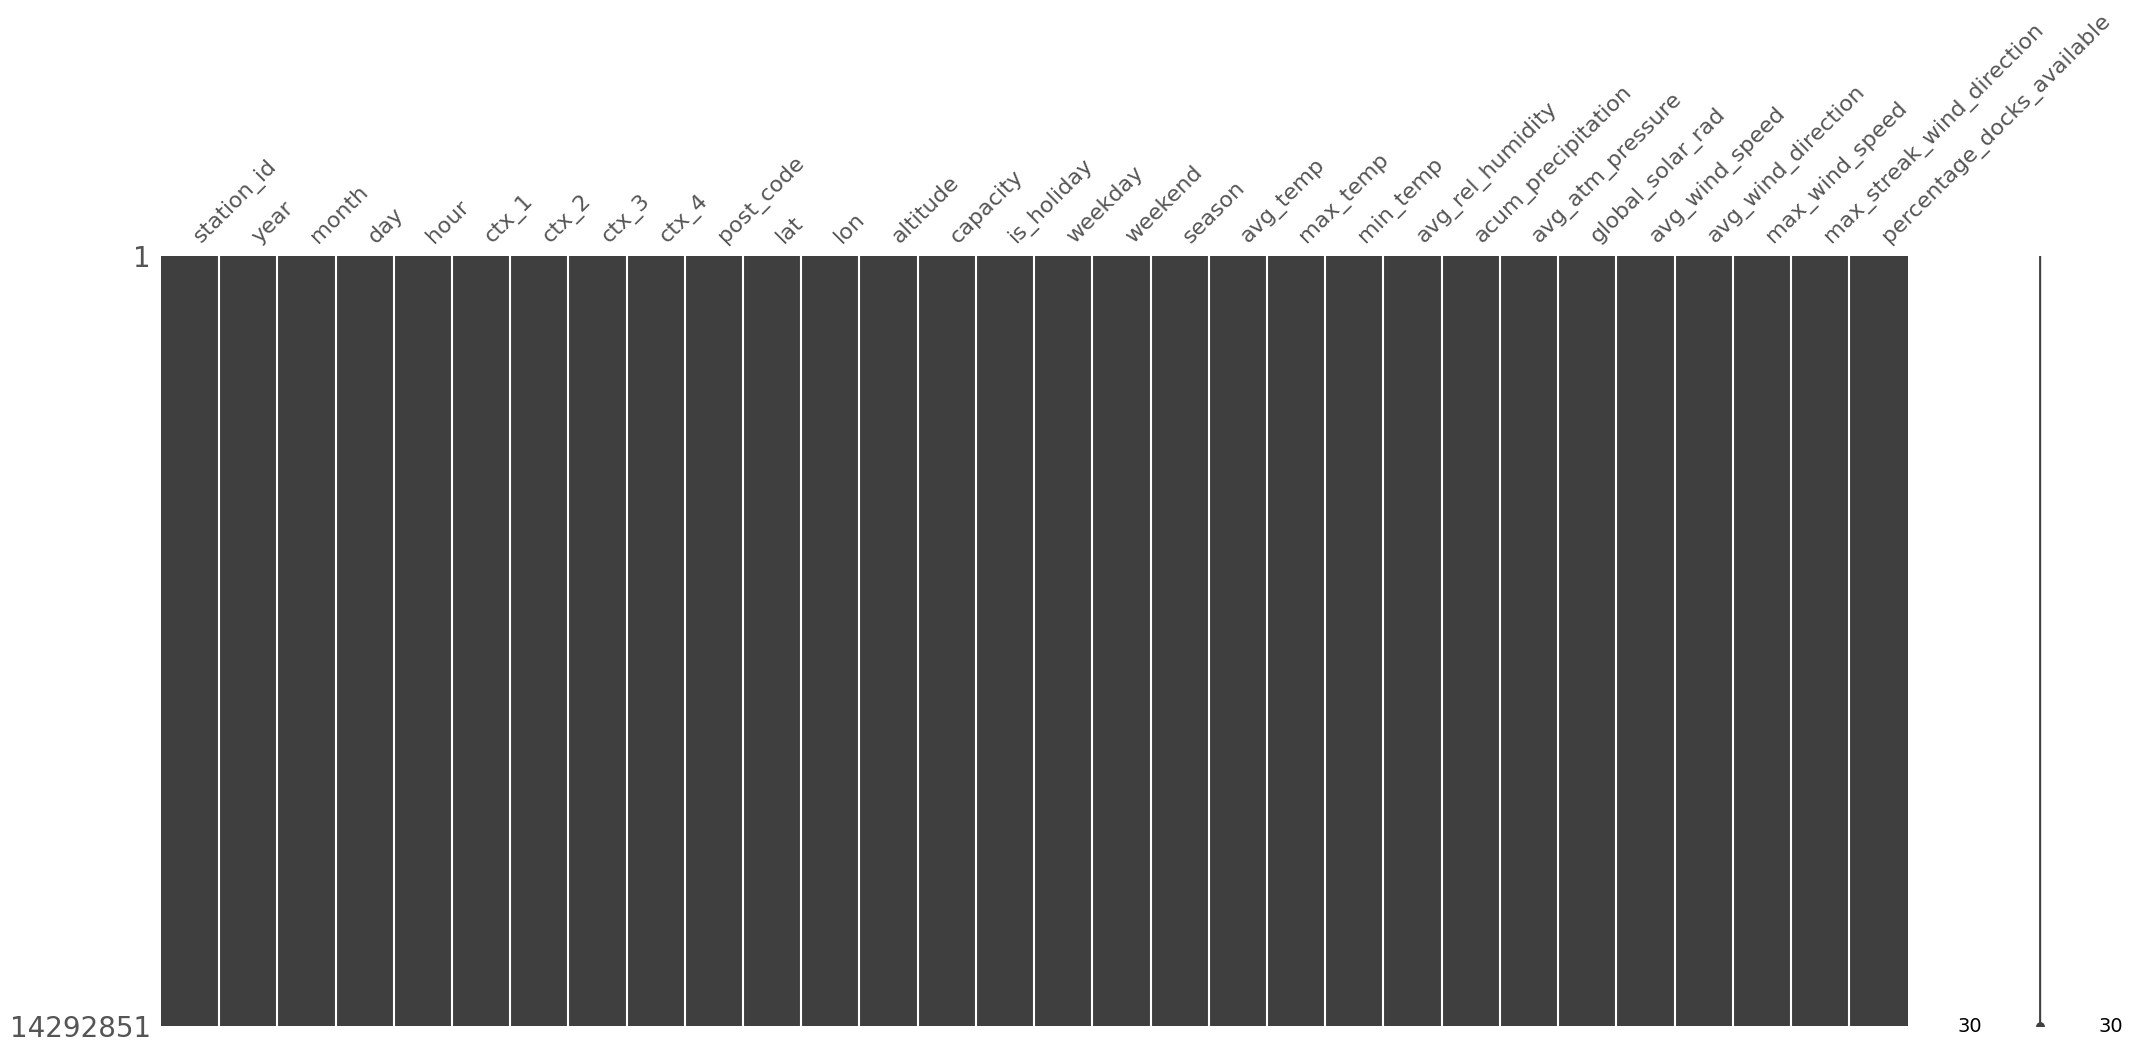

In [17]:
ax = msno.matrix(bicing.sort_values(by=['station_id', 'year', 'month', 'day']))
ax.get_figure().savefig(r'..\reports\figures\jdf_bicing_0101.png')

In [18]:
(bicing
 .select_dtypes('number')
 .drop(columns=['station_id', 'year'])
 .corr(method='spearman')
 .style
 .background_gradient(cmap='RdBu', vmax=1, vmin=-1)
 .set_sticky(axis='index')
)

,month,day,hour,ctx_1,ctx_2,ctx_3,ctx_4,lat,lon,altitude,capacity,weekday,avg_temp,max_temp,min_temp,avg_rel_humidity,acum_precipitation,avg_atm_pressure,global_solar_rad,avg_wind_speed,avg_wind_direction,max_wind_speed,max_streak_wind_direction,percentage_docks_available
month,1.000000,0.007968,0.001224,0.051159,0.051202,0.051251,0.051306,0.000049,0.002914,-0.003268,-0.000721,-0.011882,0.180192,0.160272,0.189085,0.071475,0.021301,-0.159372,-0.218862,-0.062657,0.117848,-0.026489,0.122410,0.051138
day,0.007968,1.000000,0.001887,-0.001489,-0.001492,-0.001478,-0.001466,0.000940,-0.000269,0.001032,-0.000499,0.000071,0.044831,0.042647,0.047696,0.031548,-0.066016,0.070936,0.004650,-0.050164,0.013921,-0.029847,0.008782,-0.001491
hour,0.001224,0.001887,1.000000,0.053707,0.060062,0.064691,0.064528,-0.002027,0.001634,-0.002743,-0.002774,0.000775,0.001219,0.001294,0.001137,0.000113,-0.001526,0.000998,0.001440,0.000078,-0.001504,0.000339,-0.000618,0.043922
ctx_1,0.051159,-0.001489,0.053707,1.000000,0.883525,0.763739,0.660421,0.109535,-0.254598,0.375224,-0.001696,-0.012777,0.058972,0.059827,0.058014,-0.010804,-0.019444,0.008645,0.019633,-0.020753,-0.006689,-0.017162,-0.011462,0.883525
ctx_2,0.051202,-0.001492,0.060062,0.883525,1.000000,0.883525,0.763739,0.109534,-0.254597,0.375222,-0.001699,-0.012620,0.058881,0.059702,0.057952,-0.010648,-0.019164,0.008615,0.019325,-0.020801,-0.006922,-0.017131,-0.011641,0.763740
ctx_3,0.051251,-0.001478,0.064691,0.763739,0.883525,1.000000,0.883525,0.109533,-0.254596,0.375220,-0.001704,-0.012486,0.058791,0.059573,0.057893,-0.010463,-0.018843,0.008591,0.018998,-0.020826,-0.007152,-0.017055,-0.011803,0.660421
ctx_4,0.051306,-0.001466,0.064528,0.660421,0.763739,0.883525,1.000000,0.109533,-0.254595,0.375218,-0.001707,-0.012172,0.058705,0.059436,0.057837,-0.010224,-0.018463,0.008575,0.018636,-0.020877,-0.007441,-0.016981,-0.012044,0.569350
lat,0.000049,0.000940,-0.002027,0.109535,0.109534,0.109533,0.109533,1.000000,0.456779,0.320829,-0.062215,-0.001090,-0.002252,-0.001795,-0.002120,0.000636,0.001172,0.002979,-0.004008,-0.003980,-0.000505,-0.003102,-0.000514,0.109537
lon,0.002914,-0.000269,0.001634,-0.254598,-0.254597,-0.254596,-0.254595,0.456779,1.000000,-0.648806,0.033965,0.000522,0.003465,0.003135,0.003356,0.000010,-0.000313,-0.001859,0.002681,0.001496,0.000095,0.000875,-0.000216,-0.254599
altitude,-0.003268,0.001032,-0.002743,0.375224,0.375222,0.375220,0.375218,0.320829,-0.648806,1.000000,-0.097564,-0.000934,-0.004879,-0.004226,-0.004666,0.000560,0.001410,0.003896,-0.005228,-0.004534,-0.000776,-0.003242,-0.000459,0.375226


  0%|          | 0/4 [00:00<?, ?it/s]

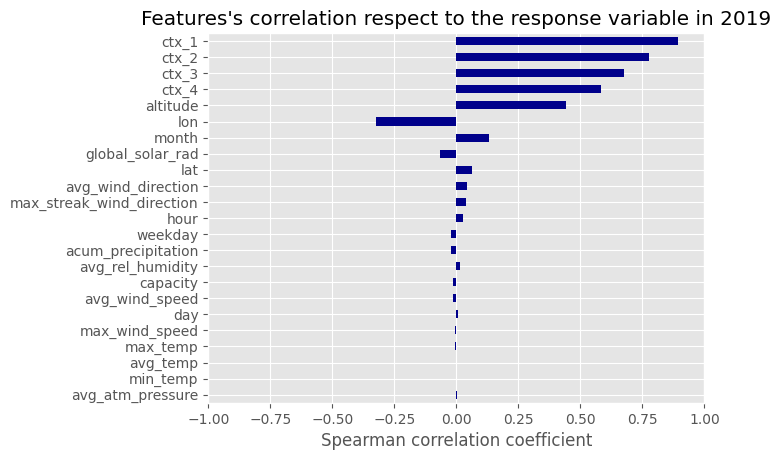

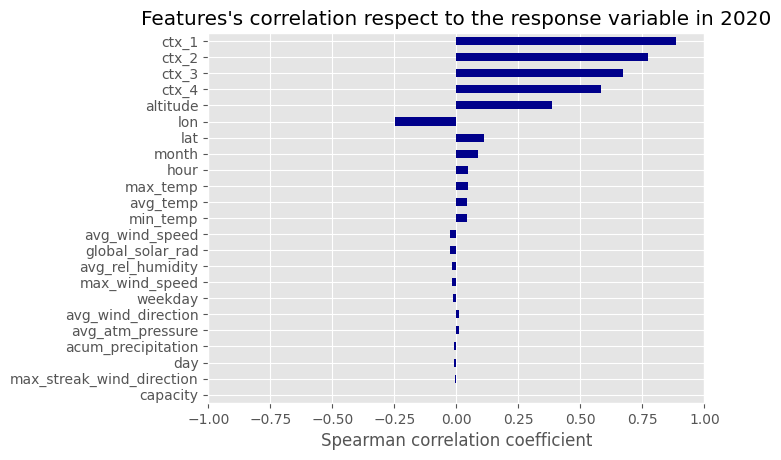

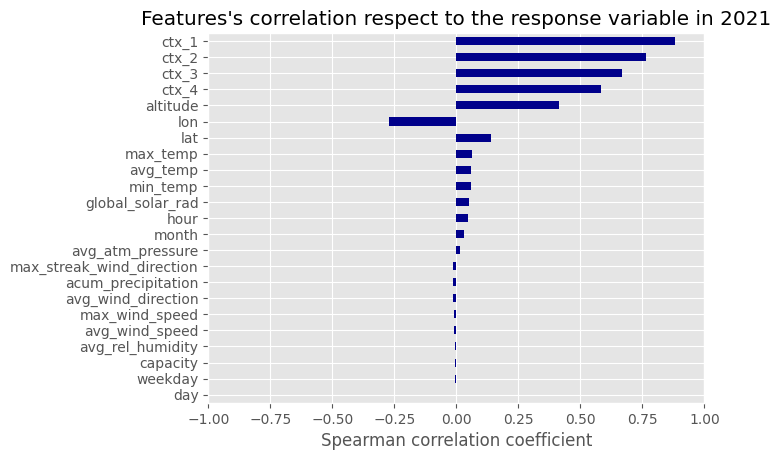

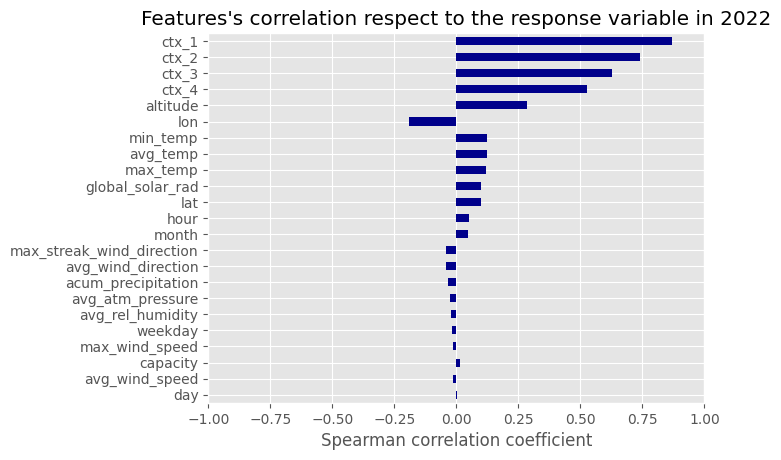

In [19]:
for year in tqdm(YEARS):
    
    fig, ax = plt.subplots()
    
    (bicing
     .query(f'year == {year}')
     .loc[:, bicing_cols]
     .select_dtypes('number')
     .drop(columns=['station_id', 'year'])
     .corr(method='spearman')
     .loc[:, 'percentage_docks_available']
     .iloc[:-1]
     .sort_values(key=lambda val: abs(val))
     .plot.barh(ax=ax, color='darkblue', xlim=(-1, 1))
    )
    
    plt.xlabel('Spearman correlation coefficient')
    plt.title(f"Features's correlation respect to the response variable in {year}")

In [20]:
(bicing
 .pivot_table(index='station_id', columns='year', values='month', aggfunc='nunique', margins=True)
 .query('All != 12')
)

year,2019,2020,2021,2022,All
station_id,,,,,


  0%|          | 0/4 [00:00<?, ?it/s]

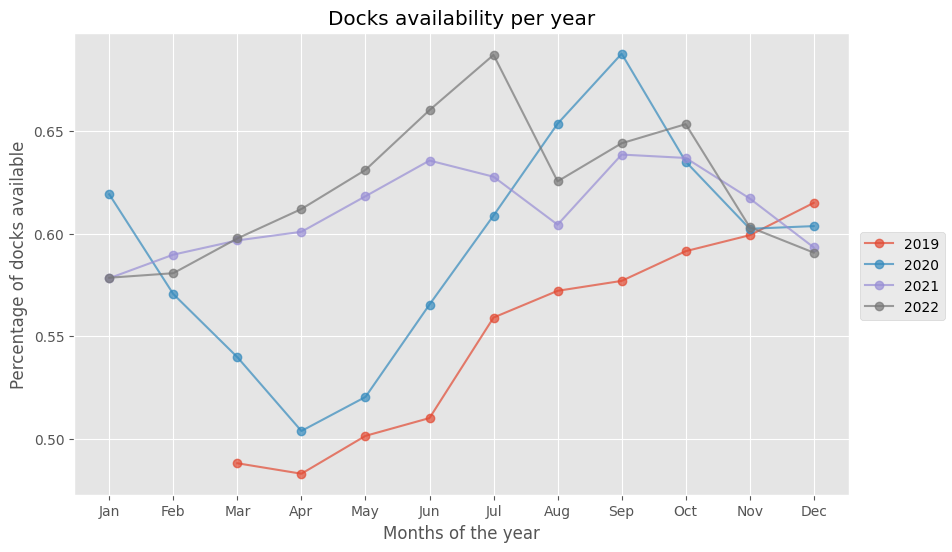

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))

for year in tqdm(YEARS):

    (bicing
     .loc[bicing['year'] == year, ['month', 'percentage_docks_available']]
     .groupby(by=['month'])
     .mean()
     .plot(legend=False, marker='o', alpha=0.7, ax=ax)
    )

plt.xticks(range(1, 13), [months[month] for month in range(1, 13)])
plt.xlabel('Months of the year')
plt.ylabel('Percentage of docks available')
plt.title('Docks availability per year')

fig.legend(YEARS, loc='center right')